<a href="https://colab.research.google.com/github/lohitha-padmavathi/salary_predictor_/blob/main/salary_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('adult_3.xlsx')

# Display the first few rows of the DataFrame
display(df.head())
col_names=df.columns
display(col_names)
display(df.info())
display(df.shape)
display(df.isnull().sum())
display(df['income'].unique())
# Identify object type columns
object_cols = df.select_dtypes(include='object').columns

# Display unique values for each object column
for col in object_cols:
    print(f"Unique values in '{col}':")
    display(df[col].unique())
    print("-" * 30)
# Replace '?' with 'Unknown' in the specified columns
cols_with_missing = ['workclass', 'occupation', 'native-country']
df[cols_with_missing] = df[cols_with_missing].replace('?', 'Unknown')

# Verify the changes by displaying unique values again
for col in cols_with_missing:
    print(f"Unique values in '{col}' after handling missing values:")
    display(df[col].unique())
    print("-" * 30)
# Select object type columns
object_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Display the first few rows and the shape of the encoded DataFrame
display(df_encoded.head())
display(df_encoded.shape)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

(48842, 15)

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


array(['<=50K', '>50K'], dtype=object)

Unique values in 'workclass':


array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

------------------------------
Unique values in 'education':


array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

------------------------------
Unique values in 'marital-status':


array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

------------------------------
Unique values in 'occupation':


array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

------------------------------
Unique values in 'relationship':


array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

------------------------------
Unique values in 'race':


array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

------------------------------
Unique values in 'gender':


array(['Male', 'Female'], dtype=object)

------------------------------
Unique values in 'native-country':


array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

------------------------------
Unique values in 'income':


array(['<=50K', '>50K'], dtype=object)

------------------------------
Unique values in 'workclass' after handling missing values:


array(['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

------------------------------
Unique values in 'occupation' after handling missing values:


array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Unknown', 'Other-service', 'Prof-specialty', 'Craft-repair',
       'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales',
       'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners',
       'Armed-Forces'], dtype=object)

------------------------------
Unique values in 'native-country' after handling missing values:


array(['United-States', 'Unknown', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

------------------------------


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,28,336951,12,0,0,40,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


(48842, 101)

In [2]:
import numpy as np

# Select numerical columns from the encoded DataFrame
numerical_cols_encoded = df_encoded.select_dtypes(include=np.number).columns

# Apply IQR method for outlier removal on the encoded DataFrame
df_encoded_cleaned = df_encoded.copy() # Create a copy
for col in numerical_cols_encoded:
    Q1 = df_encoded_cleaned[col].quantile(0.25)
    Q3 = df_encoded_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_encoded_cleaned = df_encoded_cleaned[(df_encoded_cleaned[col] >= lower_bound) & (df_encoded_cleaned[col] <= upper_bound)]

# Display the shape of the DataFrame after outlier removal
display("Shape of the encoded DataFrame after outlier removal:", df_encoded_cleaned.shape)

'Shape of the encoded DataFrame after outlier removal:'

(28560, 101)

Box plots before outlier removal (on encoded data):


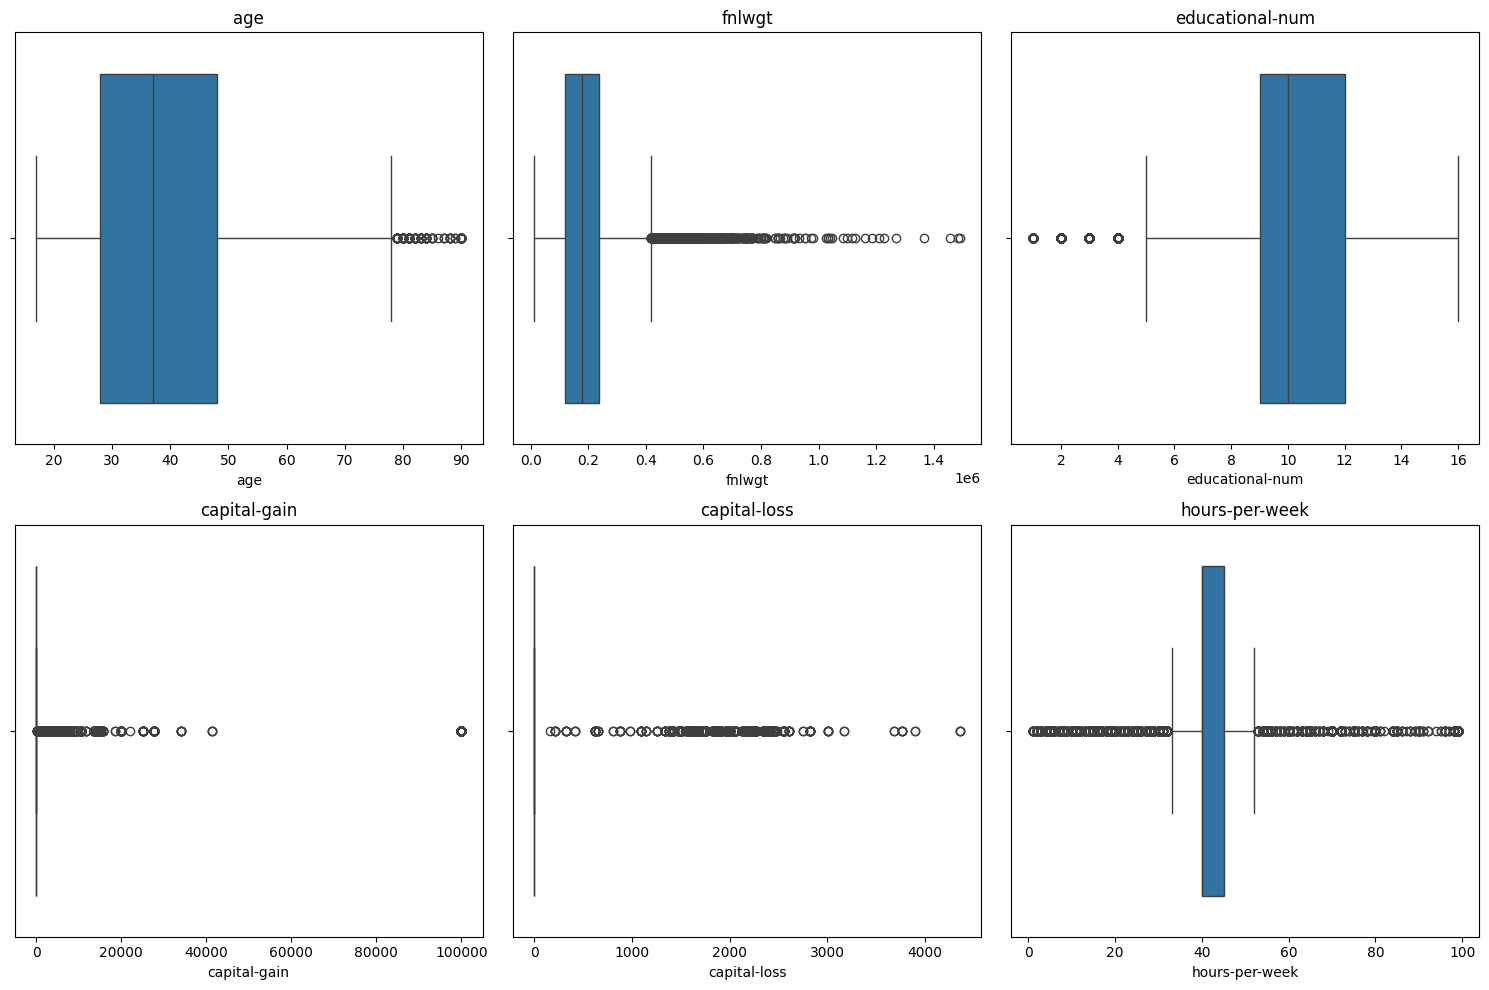


Box plots after outlier removal (on cleaned encoded data):


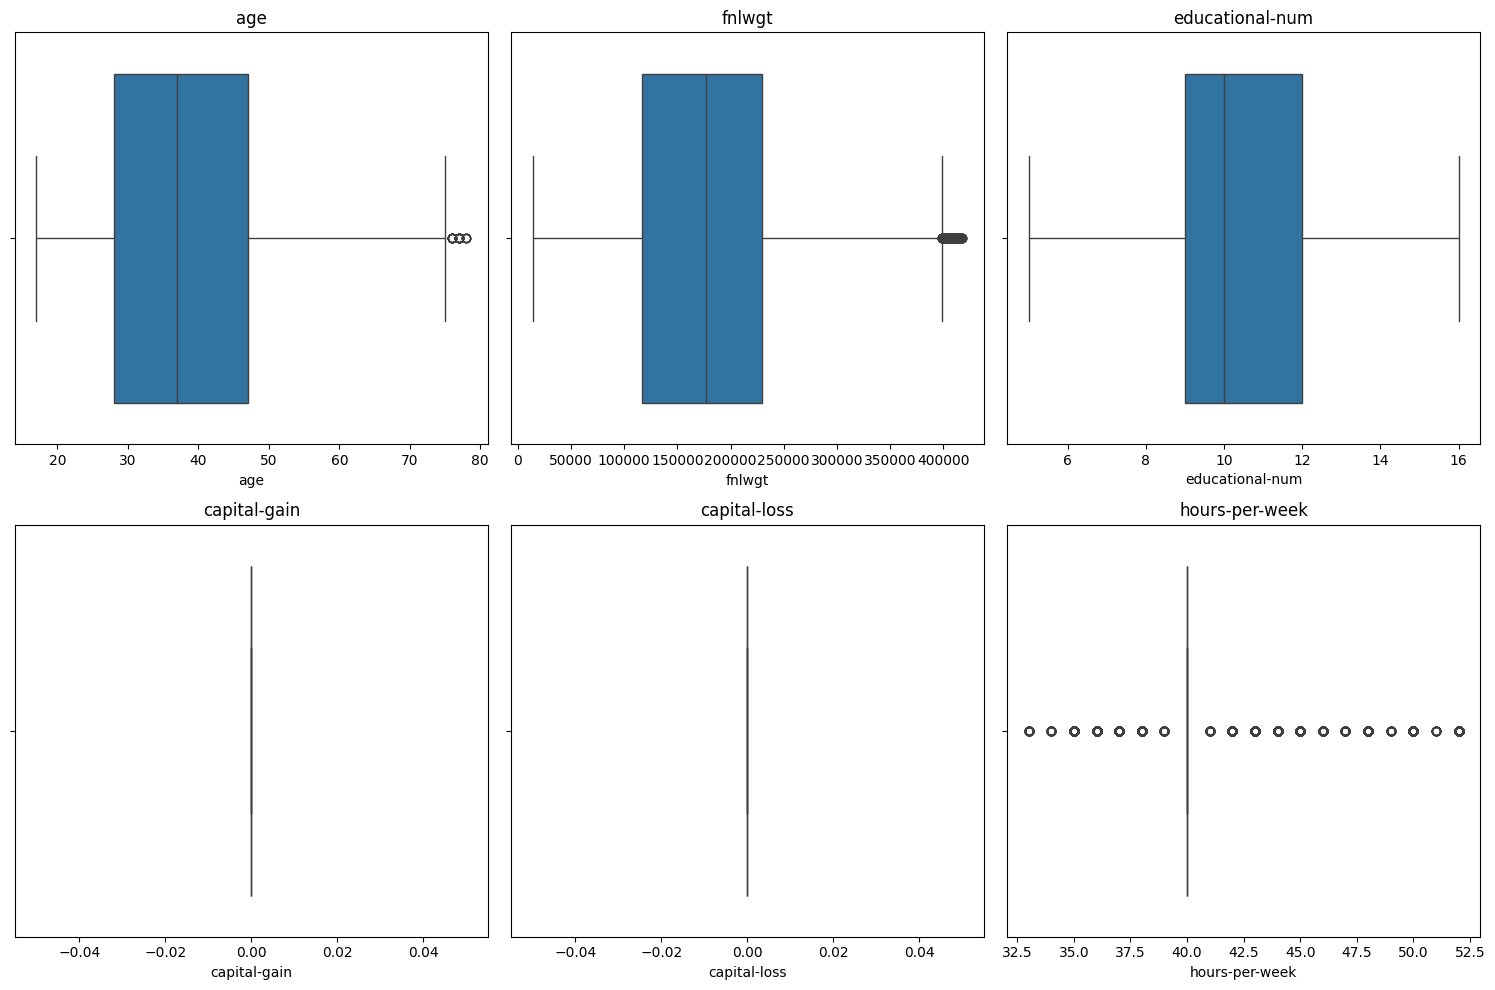

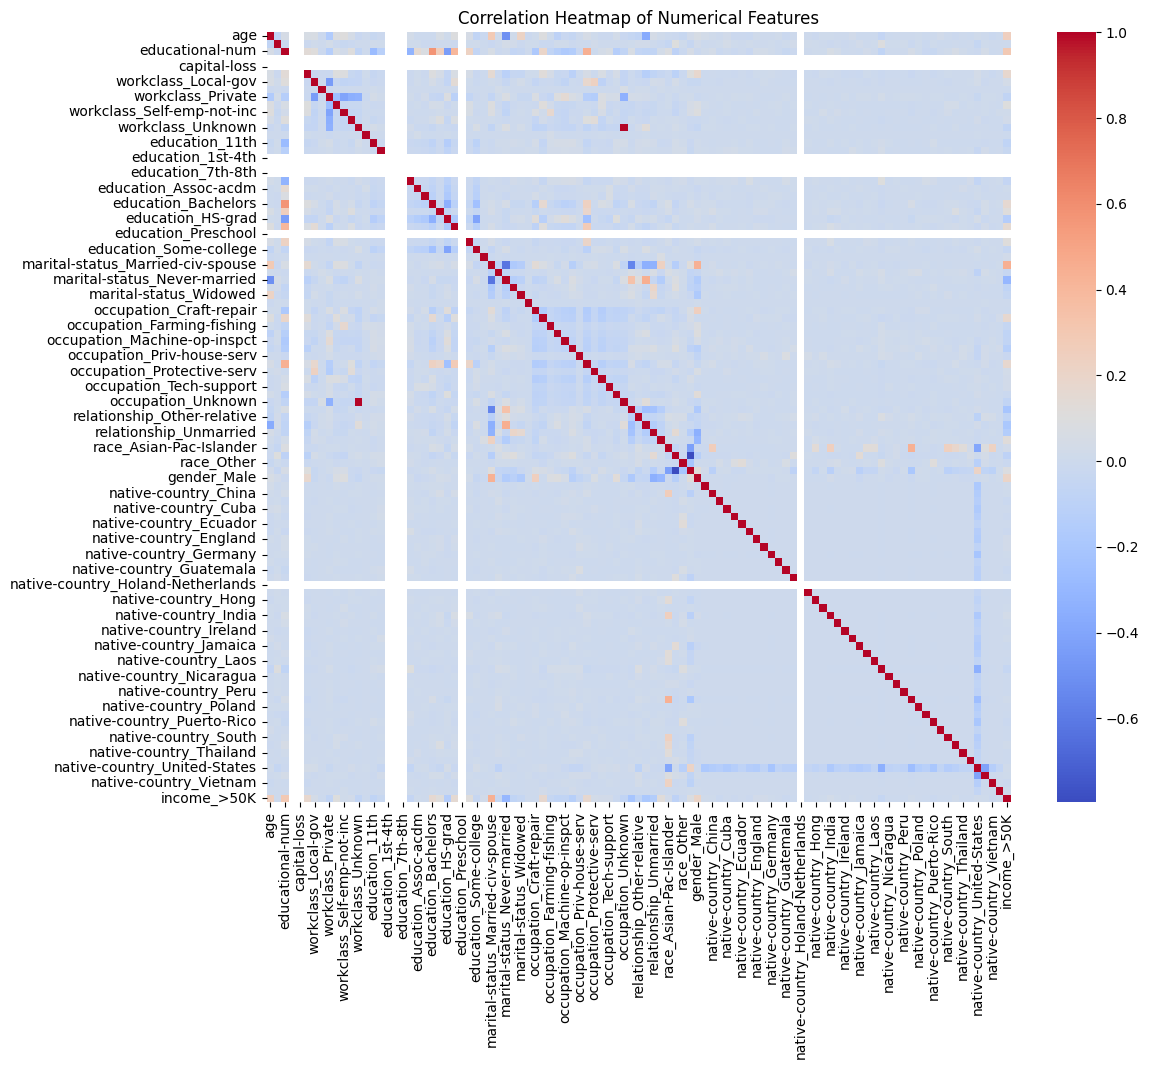

Correlation with income_>50K:


,income_>50K
income_>50K,1.000000
marital-status_Married-civ-spouse,0.439665
educational-num,0.294186
age,0.242605
gender_Male,0.203101
...,...
education_1st-4th,NaN
education_5th-6th,NaN
education_7th-8th,NaN
education_Preschool,NaN



Highly correlated feature pairs (absolute correlation >= 0.7):
workclass_Unknown and occupation_Unknown: 1.00
race_Black and race_White: -0.80


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns from the encoded DataFrame
numerical_cols_encoded = df_encoded.select_dtypes(include=np.number).columns

# Create box plots for numerical columns before outlier removal on df_encoded
print("Box plots before outlier removal (on encoded data):")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_encoded):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Create box plots for numerical columns after outlier removal on df_encoded_cleaned
print("\nBox plots after outlier removal (on cleaned encoded data):")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_encoded):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_encoded_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# Calculate the correlation matrix
correlation_matrix = df_encoded_cleaned.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# Examine the correlations with the target variable 'income_>50K'
print("Correlation with income_>50K:")
display(correlation_matrix['income_>50K'].sort_values(ascending=False))

# Identify highly correlated features (excluding correlation with itself and the target)
threshold = 0.7
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) >= threshold and col1 != 'income_>50K' and col2 != 'income_>50K':
            highly_correlated_pairs.append((col1, col2, correlation_value))

print("\nHighly correlated feature pairs (absolute correlation >= {}):".format(threshold))
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

In [5]:
# Based on the heatmap and correlation values, decision is made on the potential columns to remove.
potential_columns_to_remove = []

# Reasoning for potential removal:
# - High correlation between features (multicollinearity)
# - Very low correlation with the target variable
#explitly check for hightly corelated terms
education_cols = [col for col in correlation_matrix.columns if 'education_' in col]
for edu_col in education_cols:
    correlation_with_educational_num = correlation_matrix.loc['educational-num', edu_col]
    if abs(correlation_with_educational_num) >= 0.7:
        print(f"\n'educational-num' and '{edu_col}' are highly correlated: {correlation_with_educational_num:.2f}")
        # If highly correlated and one has lower target correlation, consider removal.
        # Let's check target correlation for educational-num and the education encoded column
        target_corr_educational_num = correlation_matrix.loc['educational-num', 'income_>50K']
        target_corr_edu_col = correlation_matrix.loc[edu_col, 'income_>50K']
        print(f"Correlation with income_>50K: educational-num={target_corr_educational_num:.2f}, {edu_col}={target_corr_edu_col:.2f}")
        # Decide which one to potentially remove. If the encoded column is less correlated with the target, consider removing it.
        if abs(target_corr_edu_col) < abs(target_corr_educational_num):
             potential_columns_to_remove.append(edu_col)


# Display the list of potential columns to remove
if potential_columns_to_remove:
    print("\nPotential columns to consider for removal based on high multicollinearity:")
    display(potential_columns_to_remove)
else:
    print("\nNo highly correlated feature pairs (absolute correlation >= {}) found for potential removal based on multicollinearity.".format(threshold))

# Display the unique values of the target column to confirm it's already encoded
print("Unique values in the target column after one-hot encoding:")
display(df_encoded_cleaned['income_>50K'].unique())

display(df_encoded_cleaned.columns)

# Check the unique values and data type of the potential target column
display(df_encoded_cleaned['income_>50K'].unique())
display(df_encoded_cleaned['income_>50K'].dtype)
print("Columns in original DataFrame (df):")
display(df.columns)

print("\nColumns in processed DataFrame (df_encoded_cleaned):")
display(df_encoded_cleaned.columns)

print("\nComparison of columns:")
original_cols = set(df.columns)
encoded_cleaned_cols = set(df_encoded_cleaned.columns)

# Find columns that were in original but not in processed (likely encoded or dropped)
removed_cols = original_cols - encoded_cleaned_cols
print("\nColumns removed from original (likely encoded or dropped):")
display(removed_cols)

# Find columns that are in processed but not in original (likely created by one-hot encoding)
added_cols = encoded_cleaned_cols - original_cols
print("\nColumns added in processed (likely from one-hot encoding):")
display(added_cols)

# Identify original numerical columns still present
numerical_cols_original = df.select_dtypes(include=np.number).columns
numerical_cols_present_in_cleaned = [col for col in numerical_cols_original if col in df_encoded_cleaned.columns]
print("\nOriginal numerical columns still present in processed DataFrame:")
display(numerical_cols_present_in_cleaned)


No highly correlated feature pairs (absolute correlation >= 0.7) found for potential removal based on multicollinearity.
Unique values in the target column after one-hot encoding:


array([False,  True])

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Unknown', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)

array([False,  True])

dtype('bool')

Columns in original DataFrame (df):


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Columns in processed DataFrame (df_encoded_cleaned):


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Unknown', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)


Comparison of columns:

Columns removed from original (likely encoded or dropped):


{'education',
 'gender',
 'income',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'workclass'}


Columns added in processed (likely from one-hot encoding):


{'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'gender_Male',
 'income_>50K',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 'native-country_England',
 'native-country_France',
 'native-country_Germany',
 'native-country_Greece',
 'native-country_Guatemala',
 'native-country_Haiti',
 'native-country_Holand-Netherlands',
 'native-country_Honduras'


Original numerical columns still present in processed DataFrame:


['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [6]:
print("Review of Feature Engineering Steps:")
print("-" * 30)

print("\n1. Handling '?' values:")
print("   - '?' values in 'workclass', 'occupation', and 'native-country' were replaced with 'Unknown'.")
print("   - This approach treats '?' as a distinct category, which might be appropriate if '?' represents a meaningful missing or unstated value.")
print("   - Potential consideration: If '?' truly represents random missingness, replacing it with a more frequent category or imputing might be considered.")

print("\n2. One-Hot Encoding:")
print("   - Categorical columns ('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income') were one-hot encoded.")
print("   - The original categorical columns were removed, and new binary columns were created for each category (except one per original column due to drop_first=True).")
print("   - The target variable 'income' was encoded into 'income_>50K_encoded' (binary 0 and 1).")

print("\n3. Outlier Removal (IQR Method):")
print("   - The IQR method was applied to numerical columns ('age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week') in the encoded DataFrame.")
print("   - This significantly reduced the number of samples (from 48842 to 28560).")
print("   - Potential consideration: For 'capital-gain' and 'capital-loss', which have many zero values, IQR might aggressively remove non-zero entries that are not true outliers but represent significant events. This could lead to a loss of potentially valuable information.")
print("   - The box plots showed that outliers were removed from 'age', 'fnlwgt', 'educational-num', and 'hours-per-week'. 'capital-gain' and 'capital-loss' box plots became flat after outlier removal, suggesting most non-zero values were removed.")

print("\n4. Correlation Analysis and Multicollinearity:")
print("   - High correlations were observed between 'workclass_Unknown' and 'occupation_Unknown' (correlation 1.0), and 'race_Black' and 'race_White' (correlation -0.80).")
print("   - Potential consideration: These highly correlated pairs indicate multicollinearity. For modeling, it might be beneficial to remove one column from each pair (e.g., 'occupation_Unknown' and 'race_White') to avoid issues like unstable coefficient estimates.")

print("\nSummary of Key Changes and Considerations:")
print("   - Missing values ('?') were treated as a separate category ('Unknown').")
print("   - Categorical features were converted to a numerical format using one-hot encoding.")
print("   - Outliers were removed from numerical columns using the IQR method, resulting in a substantial reduction in dataset size.")
print("   - High multicollinearity was identified between specific one-hot encoded pairs ('workclass_Unknown'/'occupation_Unknown' and 'race_Black'/'race_White').")
print("   - Considerations for future steps include evaluating the impact of treating '?' as 'Unknown', assessing the effect of aggressive outlier removal on 'capital-gain' and 'capital-loss', and addressing multicollinearity by potentially removing one column from highly correlated pairs before model training.")

Review of Feature Engineering Steps:
------------------------------

1. Handling '?' values:
   - '?' values in 'workclass', 'occupation', and 'native-country' were replaced with 'Unknown'.
   - This approach treats '?' as a distinct category, which might be appropriate if '?' represents a meaningful missing or unstated value.
   - Potential consideration: If '?' truly represents random missingness, replacing it with a more frequent category or imputing might be considered.

2. One-Hot Encoding:
   - Categorical columns ('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income') were one-hot encoded.
   - The original categorical columns were removed, and new binary columns were created for each category (except one per original column due to drop_first=True).
   - The target variable 'income' was encoded into 'income_>50K_encoded' (binary 0 and 1).

3. Outlier Removal (IQR Method):
   - The IQR method was applied to numerica

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded_cleaned.drop('income_>50K', axis=1)
y = df_encoded_cleaned['income_>50K']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify the numerical columns in the training set (assuming they are the same as in df_encoded_cleaned before dropping the target)
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Separate numerical and non-numerical columns in training and testing sets
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data's numerical columns and transform them
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)

# Transform the testing data's numerical columns using the same fitted scaler
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Get the non-numerical columns
non_numerical_cols = X_train.columns.difference(numerical_cols)
X_train_non_numerical = X_train[non_numerical_cols]
X_test_non_numerical = X_test[non_numerical_cols]

# Convert scaled numerical arrays back to DataFrames with original column names
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols, index=X_test.index)

# Combine the scaled numerical features with the non-numerical features
X_train_scaled = pd.concat([X_train_scaled_numerical_df, X_train_non_numerical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical_df, X_test_non_numerical], axis=1)

# Display the first few rows and shapes of the scaled DataFrames to verify
print("Scaled Training Features (X_train_scaled):")
display(X_train_scaled.head())
print("\nShape of X_train_scaled:", X_train_scaled.shape)

print("\nScaled Testing Features (X_test_scaled):")
display(X_test_scaled.head())
print("\nShape of X_test_scaled:", X_test_scaled.shape)

Scaled Training Features (X_train_scaled):


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Unmarried,relationship_Wife,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay
13119,0.911753,-0.258485,-0.580281,0.0,0.0,1.136344,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3133,1.492852,-0.888451,-0.580281,0.0,0.0,-1.636719,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
678,0.911753,-0.773793,-0.580281,0.0,0.0,-0.376236,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
31093,1.160795,-0.057690,-1.977750,0.0,0.0,-1.636719,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1261,0.330654,-0.833571,-0.580281,0.0,0.0,-0.376236,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False



Shape of X_train_scaled: (22848, 100)

Scaled Testing Features (X_test_scaled):


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Unmarried,relationship_Wife,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay
10439,0.496682,-0.663159,-0.114458,0.0,0.0,-0.376236,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
26691,-0.831544,0.356357,-1.511927,0.0,0.0,-0.376236,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
13759,0.579696,2.106950,-0.114458,0.0,0.0,2.144730,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5932,1.741894,0.237904,1.748835,0.0,0.0,2.144730,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
171,-0.333459,0.111710,1.748835,0.0,0.0,-0.376236,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False



Shape of X_test_scaled: (5712, 100)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model: Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
display(conf_matrix)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier model
# You can add hyperparameters here if you want to tune the model, e.g., max_depth=5
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
model_dt.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_dt = model_dt.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Model: Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")
print("\nClassification Report:")
print(report_dt)
print("\nConfusion Matrix:")
display(conf_matrix_dt)

Model: Logistic Regression
Accuracy: 0.8421
F1-score: 0.5824

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      4486
        True       0.67      0.51      0.58      1226

    accuracy                           0.84      5712
   macro avg       0.77      0.72      0.74      5712
weighted avg       0.83      0.84      0.83      5712


Confusion Matrix:


array([[4181,  305],
       [ 597,  629]])

Model: Decision Tree Classifier
Accuracy: 0.7729
F1-score: 0.4884

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.85      0.85      4486
        True       0.47      0.50      0.49      1226

    accuracy                           0.77      5712
   macro avg       0.67      0.68      0.67      5712
weighted avg       0.78      0.77      0.78      5712


Confusion Matrix:


array([[3796,  690],
       [ 607,  619]])

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier model
# You can add hyperparameters here if you want to tune the model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the scaled training data using the correct target column
model_xgb.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Model: XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")
print("\nClassification Report:")
print(report_xgb)
print("\nConfusion Matrix:")
display(conf_matrix_xgb)

Model: XGBoost Classifier
Accuracy: 0.8347
F1-score: 0.5697

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.92      0.90      4486
        True       0.65      0.51      0.57      1226

    accuracy                           0.83      5712
   macro avg       0.76      0.72      0.73      5712
weighted avg       0.82      0.83      0.83      5712


Confusion Matrix:


array([[4143,  343],
       [ 601,  625]])

In [12]:
# Compare the models based on F1-score
models = {
    'Logistic Regression': f1,
    'Decision Tree Classifier': f1_dt,
    'XGBoost Classifier': f1_xgb
}

best_model_name = max(models, key=models.get)
best_f1_score = models[best_model_name]

print(f"The model with the highest F1-score is: {best_model_name} (F1-score: {best_f1_score:.4f})")

The model with the highest F1-score is: Logistic Regression (F1-score: 0.5824)


In [13]:
import pickle

# Assuming 'model' is your trained Logistic Regression model
# If you trained other models, make sure to use the variable name of the best model (e.g., model_lr if you named it that)
# In this case, 'model' is the Logistic Regression model from cell sg-wxeia-Uru
best_model = model

# Define the filename for the pickled model
filename = 'logistic_regression_model.pkl'

# Open the file in write binary mode
with open(filename, 'wb') as f:
    # Pickle the model and save it to the file
    pickle.dump(best_model, f)

print(f"The best model (Logistic Regression) has been pickled and saved as '{filename}'")
#The pickled model can later be used in model deployment using flask etc.

The best model (Logistic Regression) has been pickled and saved as 'logistic_regression_model.pkl'
